# Exploratory Data Analysis on ODI Cricket Matches
*   Author: Sanjay S Rao
*   LinkedIn: https://www.linkedin.com/in/sanjay-srinivasa-rao-b67a771a0/

Analyzing the all the data of ODI cricket matches played in past.

# INTRODUCTION

Here we will use a dataset to analyze on ODI cricket matches. You can find this dataset here : https://www.kaggle.com/jaykay12/odi-cricket-matches-19712017

In [1]:
!pip install pandas jovian --quiet
import jovian
import pandas as pd

<IPython.core.display.Javascript object>

In [3]:
raw_df=pd.read_csv('./Cricket ODI data/originalDataset.csv')

In [4]:
raw_df

,Scorecard,Team 1,Team 2,Winner,Margin,Ground,Match Date
0,ODI # 1,Australia,England,Australia,5 wickets,Melbourne,"Jan 5, 1971"
1,ODI # 2,England,Australia,England,6 wickets,Manchester,"Aug 24, 1972"
2,ODI # 3,England,Australia,Australia,5 wickets,Lord's,"Aug 26, 1972"
3,ODI # 4,England,Australia,England,2 wickets,Birmingham,"Aug 28, 1972"
4,ODI # 5,New Zealand,Pakistan,New Zealand,22 runs,Christchurch,"Feb 11, 1973"
...,...,...,...,...,...,...,...
3927,ODI # 3928,India,New Zealand,New Zealand,6 wickets,Mumbai,"Oct 22, 2017"
3928,ODI # 3929,South Africa,Bangladesh,South Africa,200 runs,East London,"Oct 22, 2017"
3929,ODI # 3930,Pakistan,Sri Lanka,Pakistan,9 wickets,Sharjah,"Oct 23, 2017"
3930,ODI # 3931,India,New Zealand,India,6 wickets,Pune,"Oct 25, 2017"


In [5]:
raw_df.columns

Index(['Scorecard', 'Team 1', 'Team 2', 'Winner', 'Margin', 'Ground',
       'Match Date'],
      dtype='object')

# Data Cleaning and Preparation

As we know that, In every dataset there are some incorrect values so we will get rid from this situation.

In [6]:
raw_df.Scorecard.max()

'ODI # 999'

In [7]:
raw_df.head()

,Scorecard,Team 1,Team 2,Winner,Margin,Ground,Match Date
0,ODI # 1,Australia,England,Australia,5 wickets,Melbourne,"Jan 5, 1971"
1,ODI # 2,England,Australia,England,6 wickets,Manchester,"Aug 24, 1972"
2,ODI # 3,England,Australia,Australia,5 wickets,Lord's,"Aug 26, 1972"
3,ODI # 4,England,Australia,England,2 wickets,Birmingham,"Aug 28, 1972"
4,ODI # 5,New Zealand,Pakistan,New Zealand,22 runs,Christchurch,"Feb 11, 1973"


In [8]:
raw_df.dtypes

Scorecard     object
Team 1        object
Team 2        object
Winner        object
Margin        object
Ground        object
Match Date    object
dtype: object

In [9]:
#Lets Try to find null values
raw_df.isnull().sum()
#The margin has 179 matches where thevalue is missing,Lets Try to see why

Scorecard       0
Team 1          0
Team 2          0
Winner          0
Margin        179
Ground          0
Match Date      0
dtype: int64

In [10]:
#Lets delete rows which have no results as analysis of it is unnecessary
raw_df = raw_df[raw_df.Margin.str.contains("result") == False]

In [11]:
old_df = raw_df.Winner.value_counts()

In [12]:
##As you can see we have deleted no result values
old_df

Australia       555
India           475
Pakistan        466
West Indies     380
Sri Lanka       371
South Africa    361
England         343
New Zealand     324
Zimbabwe        129
Bangladesh      105
Ireland          51
Afghanistan      42
Kenya            42
Scotland         31
Netherlands      28
Canada           17
U.A.E.            9
Bermuda           7
Hong Kong         6
P.N.G.            5
Asia XI           4
ICC World XI      1
Africa XI         1
Name: Winner, dtype: int64

In [14]:
#Now Lets find a way to see how many matches have each team played. We have two columns wit different team names so we will have to conduct proper EDA
group1=raw_df.groupby("Team 1").size().rename("Team First")
group2=raw_df.groupby("Team 2").size().rename("Team Second")

total_df=pd.concat([group1,group2],axis=1).fillna(0)
total_df["total"]=total_df["Team First"]+total_df["Team Second"]

total_df.columns
##This gives us the total matches played by each team.Lets draw a seaborn visualisation 

Index(['Team First', 'Team Second', 'total'], dtype='object')

In [15]:
#to resolve package incompatibility issues!
#!pip uninstall matplotlib
!pip install matplotlib==3.1.3

#!pip uninstall imgaug
!pip install imgaug==0.4.0

^C
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.3.4
    Uninstalling matplotlib-3.3.4:
      Successfully uninstalled matplotlib-3.3.4
^C


In [16]:
#!pip install matplotlib seaborn --upgrade --quiet
#import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 1.0, 'ODI Matches Played by team')

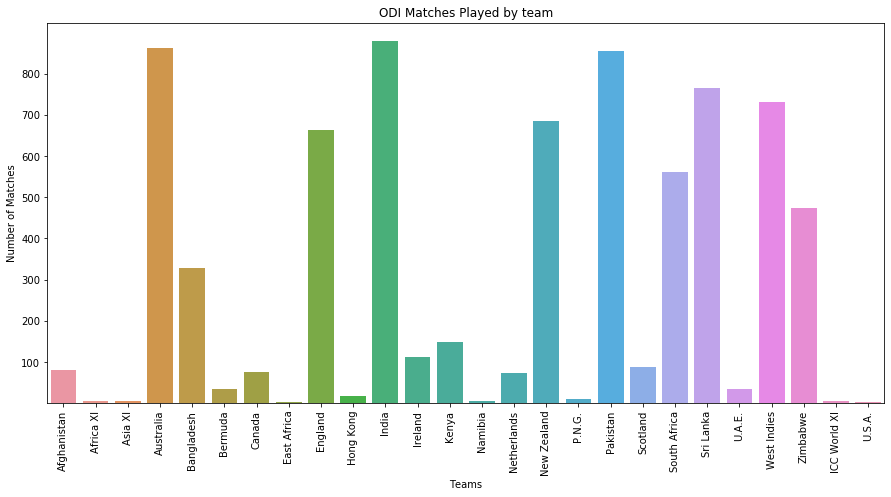

In [17]:
%matplotlib inline
plt.figure(figsize=(15, 7))
sns.barplot(x=total_df.index,y=total_df["total"])
plt.ylabel("Number of Matches")
plt.xlabel("Teams")
plt.yticks([100,200,300,400,500,600,700,800])
plt.xticks(rotation=90)
plt.title("ODI Matches Played by team")

In [18]:
total_df

,Team First,Team Second,total
Afghanistan,38.0,43.0,81.0
Africa XI,5.0,0.0,5.0
Asia XI,1.0,5.0,6.0
Australia,558.0,304.0,862.0
Bangladesh,210.0,118.0,328.0
Bermuda,17.0,18.0,35.0
Canada,48.0,27.0,75.0
East Africa,2.0,1.0,3.0
England,373.0,291.0,664.0
Hong Kong,10.0,7.0,17.0


In [19]:
sort_df = total_df.sort_values('total', ascending = False).head(16)
sort_df

,Team First,Team Second,total
India,538.0,342.0,880.0
Australia,558.0,304.0,862.0
Pakistan,373.0,481.0,854.0
Sri Lanka,279.0,487.0,766.0
West Indies,247.0,484.0,731.0
New Zealand,366.0,320.0,686.0
England,373.0,291.0,664.0
South Africa,267.0,294.0,561.0
Zimbabwe,189.0,285.0,474.0
Bangladesh,210.0,118.0,328.0


# Exploratory Analysis and Visualisation


Let's start asking interesting questions about the data now.Beginning from gathering all the tools we will require to build the cool looking graphs.

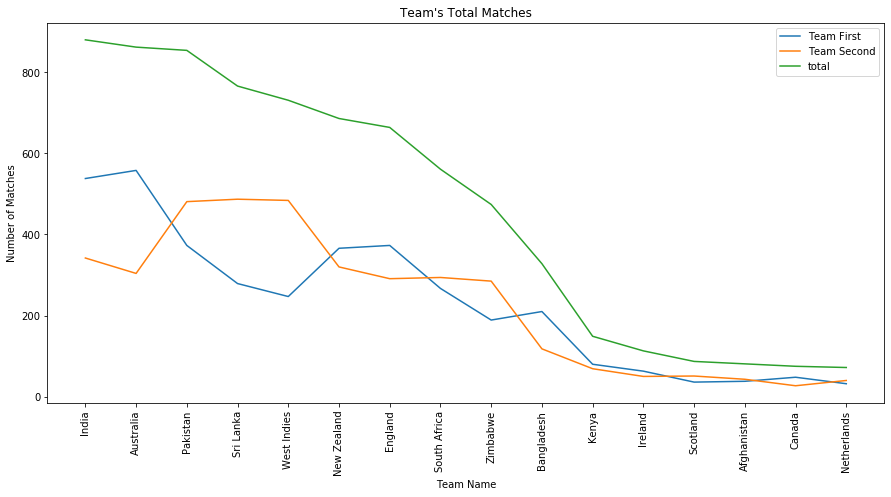

In [20]:
plt.figure(figsize=(15,7))
plt.plot(sort_df)
plt.xticks(rotation=90)

plt.xlabel('Team Name')
plt.ylabel('Number of Matches')
plt.title("Team's Total Matches")
plt.legend(['Team First', 'Team Second', 'total'])

In [25]:
#to get the teams which played first
main1_df = raw_df.groupby("Team 1").size()
sort2_df = main1_df.sort_values(ascending = False)
sort2_df

Team 1
Australia       558
India           538
Pakistan        373
England         373
New Zealand     366
Sri Lanka       279
South Africa    267
West Indies     247
Bangladesh      210
Zimbabwe        189
Kenya            80
Ireland          63
Canada           48
Afghanistan      38
Scotland         36
Netherlands      32
Bermuda          17
U.A.E.           17
Hong Kong        10
Africa XI         5
Namibia           2
P.N.G.            2
East Africa       2
Asia XI           1
dtype: int64

In [26]:
#to get the teams which played second
main2_df = raw_df.groupby("Team 2").size()
sort3_df = main2_df.sort_values(ascending = False)
sort3_df

Team 2
Sri Lanka       487
West Indies     484
Pakistan        481
India           342
New Zealand     320
Australia       304
South Africa    294
England         291
Zimbabwe        285
Bangladesh      118
Kenya            69
Scotland         51
Ireland          50
Afghanistan      43
Netherlands      40
Canada           27
U.A.E.           18
Bermuda          18
P.N.G.            8
Hong Kong         7
Asia XI           5
Namibia           4
ICC World XI      4
U.S.A.            2
East Africa       1
dtype: int64

In [27]:
#to get the overall count of matches played by each team
overall_df = sort2_df + sort3_df
overall2_df = overall_df.sort_values(ascending = False)
overall2_df

India           880.0
Australia       862.0
Pakistan        854.0
Sri Lanka       766.0
West Indies     731.0
New Zealand     686.0
England         664.0
South Africa    561.0
Zimbabwe        474.0
Bangladesh      328.0
Kenya           149.0
Ireland         113.0
Scotland         87.0
Afghanistan      81.0
Canada           75.0
Netherlands      72.0
U.A.E.           35.0
Bermuda          35.0
Hong Kong        17.0
P.N.G.           10.0
Asia XI           6.0
Namibia           6.0
East Africa       3.0
Africa XI         NaN
ICC World XI      NaN
U.S.A.            NaN
dtype: float64

In [28]:
Looser2_df = overall2_df - old_df # total matches played - total matches won
Looser_df = Looser2_df.sort_values(ascending = False)
Looser_df.head(17)

India           405.0
Sri Lanka       395.0
Pakistan        388.0
New Zealand     362.0
West Indies     351.0
Zimbabwe        345.0
England         321.0
Australia       307.0
Bangladesh      223.0
South Africa    200.0
Kenya           107.0
Ireland          62.0
Canada           58.0
Scotland         56.0
Netherlands      44.0
Afghanistan      39.0
Bermuda          28.0
dtype: float64

By solving some simple math, here we got the all the loosing match by all the teams.
First we calculated 'Team First' all Matches and 'Team Second' all Matches and we add those two dataframes.
Hence we got the total match played by all the teams.
Finally we Subtracted the Winner dataframe from the Total dataframe to get the looser dataframe.

# Q(1) - Which Team won the most matches?

So for finding this, we will write some code to get most winning Team 

In [29]:
Winner_df = raw_df.Winner.value_counts()

In [30]:
Winner_df

Australia       555
India           475
Pakistan        466
West Indies     380
Sri Lanka       371
South Africa    361
England         343
New Zealand     324
Zimbabwe        129
Bangladesh      105
Ireland          51
Afghanistan      42
Kenya            42
Scotland         31
Netherlands      28
Canada           17
U.A.E.            9
Bermuda           7
Hong Kong         6
P.N.G.            5
Asia XI           4
ICC World XI      1
Africa XI         1
Name: Winner, dtype: int64

So We saw that Most winning team is 'Australia'. It Means, In whole datset Australia is that team who won maximum 555 matches.
Lets do some Extra Activity on this.....

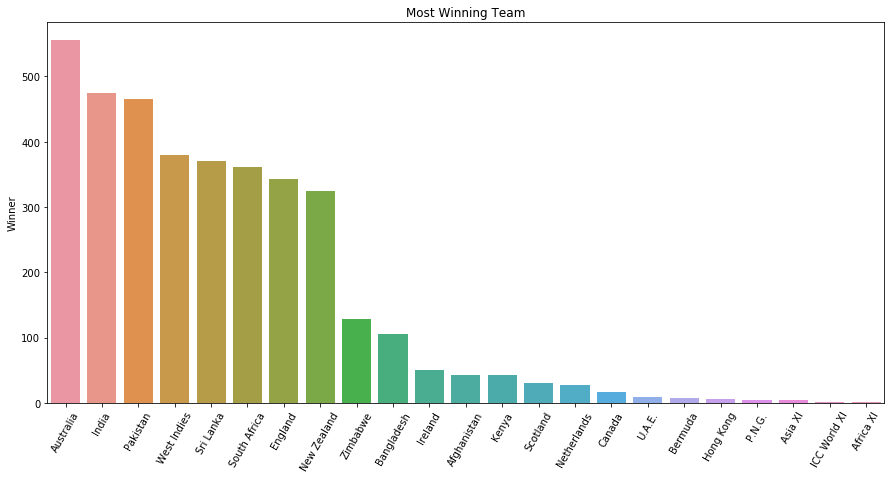

In [31]:
plt.figure(figsize=(15,7))
plt.xticks(rotation=60)
plt.title("Most Winning Team")
sns.barplot(x=Winner_df.index,y=Winner_df);

In [32]:
sns.set_style("whitegrid")

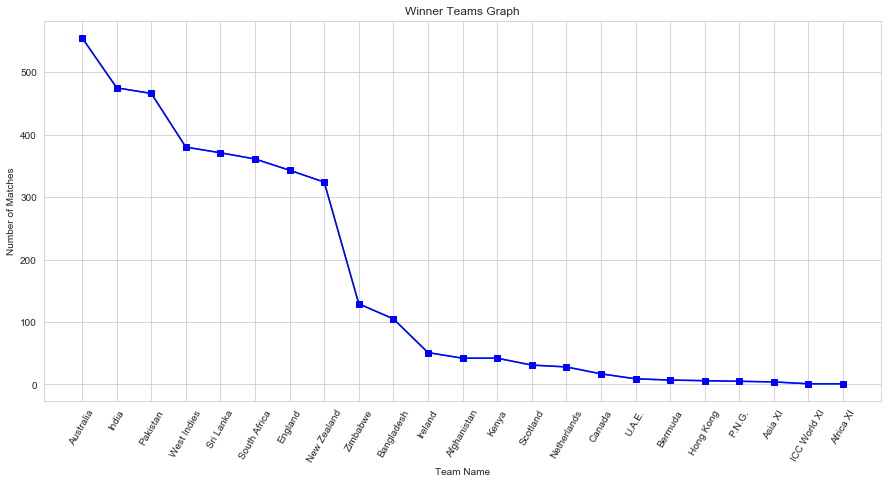

In [33]:
plt.figure(figsize=(15,7))
plt.plot(Winner_df)
plt.xticks(rotation=60)

plt.xlabel('Team Name')
plt.ylabel('Number of Matches')
plt.title("Winner Teams Graph")
plt.plot(Winner_df, 's-b')

# Q(2) - Which Team Played the Most Matches?

Let's find the team with most played matches.

In [34]:
overall_df = sort2_df + sort3_df
overall2_df = overall_df.sort_values(ascending = False)

Here in 'sort2_df' , we declared the all teams which has comes in Team First.
And in 'sort3_df', we declared all the teams which comes under Team Second.
And after this we added sort2_df and sort3_df so we will Find the final Dataframe in which we will see all the teams with total played matches.

In [35]:
complete_df = overall2_df.head(23)

In [36]:
complete_df

India           880.0
Australia       862.0
Pakistan        854.0
Sri Lanka       766.0
West Indies     731.0
New Zealand     686.0
England         664.0
South Africa    561.0
Zimbabwe        474.0
Bangladesh      328.0
Kenya           149.0
Ireland         113.0
Scotland         87.0
Afghanistan      81.0
Canada           75.0
Netherlands      72.0
U.A.E.           35.0
Bermuda          35.0
Hong Kong        17.0
P.N.G.           10.0
Asia XI           6.0
Namibia           6.0
East Africa       3.0
dtype: float64

Here we found that 'India' is the team who played most matches till 2017.

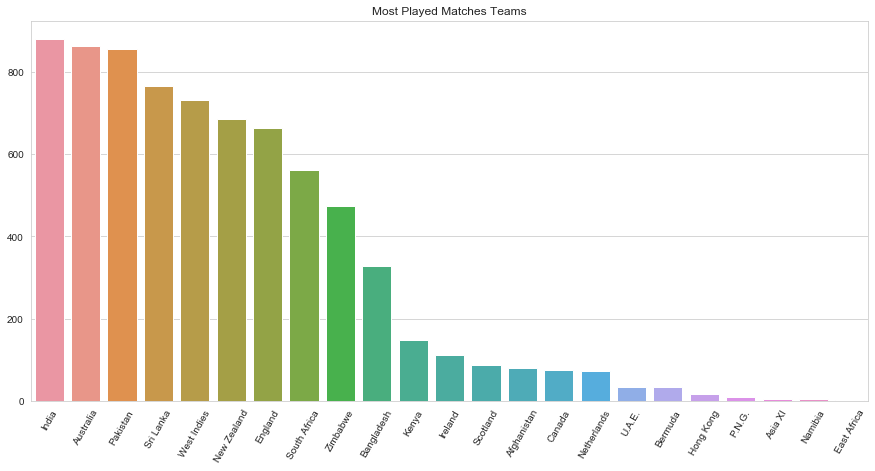

In [37]:
plt.figure(figsize=(15,7))
plt.xticks(rotation=60)
plt.title("Most Played Matches Teams")
sns.barplot(x=complete_df.index,y=complete_df);

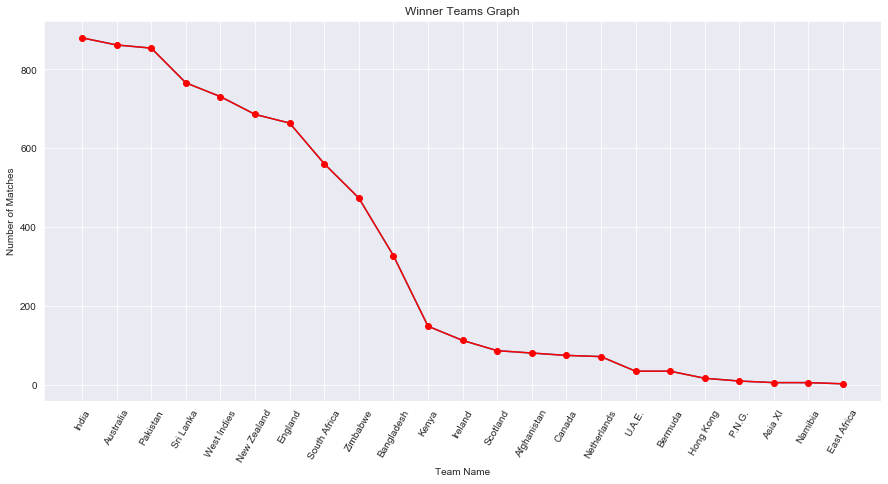

In [38]:
sns.set_style("darkgrid")
plt.figure(figsize=(15,7))
plt.plot(complete_df)
plt.xticks(rotation=60)

plt.xlabel('Team Name')
plt.ylabel('Number of Matches')
plt.title("Winner Teams Graph")
plt.plot(complete_df, 'o-r')

# Q(3) - Which Team lost the most matches? 

Here we have two dataframes, Total played matches and Winners.
So If we subtract 'Winner_df' frome 'overall2_df' then we will get the looser_df.
So let's do this

In [39]:
Looser2_df = overall2_df - Winner_df

In [40]:
Looser_df = Looser2_df.sort_values(ascending  = False).head(21)

In [41]:
Looser_df

India           405.0
Sri Lanka       395.0
Pakistan        388.0
New Zealand     362.0
West Indies     351.0
Zimbabwe        345.0
England         321.0
Australia       307.0
Bangladesh      223.0
South Africa    200.0
Kenya           107.0
Ireland          62.0
Canada           58.0
Scotland         56.0
Netherlands      44.0
Afghanistan      39.0
Bermuda          28.0
U.A.E.           26.0
Hong Kong        11.0
P.N.G.            5.0
Asia XI           2.0
dtype: float64

Result is Infront of you guys, As India played most matches and also Lost Most matches.
This is some funny, Anyways, lets show it on graph

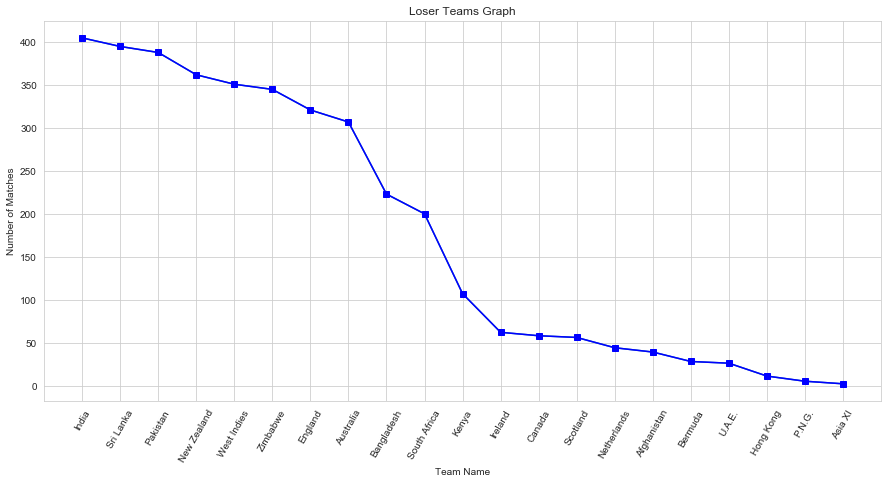

In [42]:
sns.set_style("whitegrid")
plt.figure(figsize=(15,7))
plt.plot(Looser_df)
plt.xticks(rotation=60)

plt.xlabel('Team Name')
plt.ylabel('Number of Matches')
plt.title("Loser Teams Graph")
plt.plot(Looser_df, 's-b')

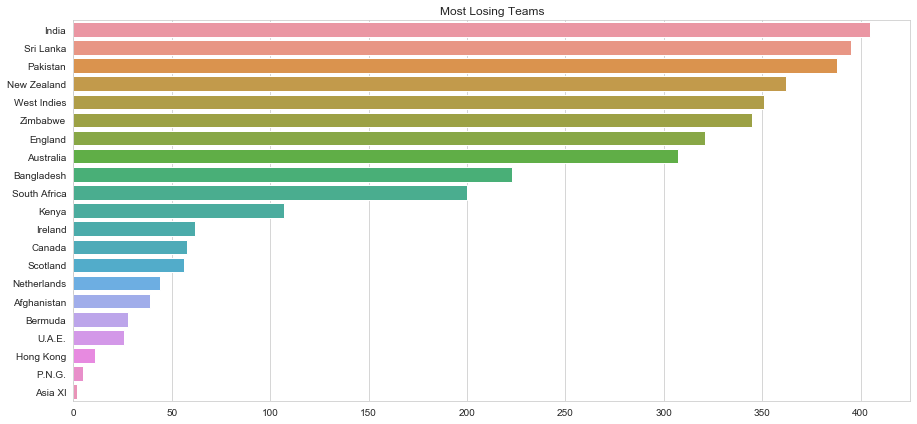

In [43]:
plt.figure(figsize=(15,7))
plt.xticks(rotation=0)
plt.title("Most Losing Teams")
sns.barplot(x=Looser_df,y=Looser_df.index);

# Q(4) - Which Team has the best winning Ratio?

For finding the ratio we will divide the total matches from winning matches

In [44]:
Winner_df

Australia       555
India           475
Pakistan        466
West Indies     380
Sri Lanka       371
South Africa    361
England         343
New Zealand     324
Zimbabwe        129
Bangladesh      105
Ireland          51
Afghanistan      42
Kenya            42
Scotland         31
Netherlands      28
Canada           17
U.A.E.            9
Bermuda           7
Hong Kong         6
P.N.G.            5
Asia XI           4
ICC World XI      1
Africa XI         1
Name: Winner, dtype: int64

In [45]:
complete_df

India           880.0
Australia       862.0
Pakistan        854.0
Sri Lanka       766.0
West Indies     731.0
New Zealand     686.0
England         664.0
South Africa    561.0
Zimbabwe        474.0
Bangladesh      328.0
Kenya           149.0
Ireland         113.0
Scotland         87.0
Afghanistan      81.0
Canada           75.0
Netherlands      72.0
U.A.E.           35.0
Bermuda          35.0
Hong Kong        17.0
P.N.G.           10.0
Asia XI           6.0
Namibia           6.0
East Africa       3.0
dtype: float64

In [46]:
Ratio2_df = Winner_df / complete_df

In [47]:
Ratio2_df

Afghanistan     0.518519
Africa XI            NaN
Asia XI         0.666667
Australia       0.643852
Bangladesh      0.320122
Bermuda         0.200000
Canada          0.226667
East Africa          NaN
England         0.516566
Hong Kong       0.352941
ICC World XI         NaN
India           0.539773
Ireland         0.451327
Kenya           0.281879
Namibia              NaN
Netherlands     0.388889
New Zealand     0.472303
P.N.G.          0.500000
Pakistan        0.545667
Scotland        0.356322
South Africa    0.643494
Sri Lanka       0.484334
U.A.E.          0.257143
West Indies     0.519836
Zimbabwe        0.272152
dtype: float64

In [48]:
ratio_df = Ratio2_df.sort_values(ascending = False)

In [49]:
ratio_df

Asia XI         0.666667
Australia       0.643852
South Africa    0.643494
Pakistan        0.545667
India           0.539773
West Indies     0.519836
Afghanistan     0.518519
England         0.516566
P.N.G.          0.500000
Sri Lanka       0.484334
New Zealand     0.472303
Ireland         0.451327
Netherlands     0.388889
Scotland        0.356322
Hong Kong       0.352941
Bangladesh      0.320122
Kenya           0.281879
Zimbabwe        0.272152
U.A.E.          0.257143
Canada          0.226667
Bermuda         0.200000
Africa XI            NaN
East Africa          NaN
ICC World XI         NaN
Namibia              NaN
dtype: float64

In [50]:
Ratio_df = ratio_df.head(21)

In [51]:
Ratio_df

Asia XI         0.666667
Australia       0.643852
South Africa    0.643494
Pakistan        0.545667
India           0.539773
West Indies     0.519836
Afghanistan     0.518519
England         0.516566
P.N.G.          0.500000
Sri Lanka       0.484334
New Zealand     0.472303
Ireland         0.451327
Netherlands     0.388889
Scotland        0.356322
Hong Kong       0.352941
Bangladesh      0.320122
Kenya           0.281879
Zimbabwe        0.272152
U.A.E.          0.257143
Canada          0.226667
Bermuda         0.200000
dtype: float64

Result is here, Team 'Asia XI' has the most winning ratio.

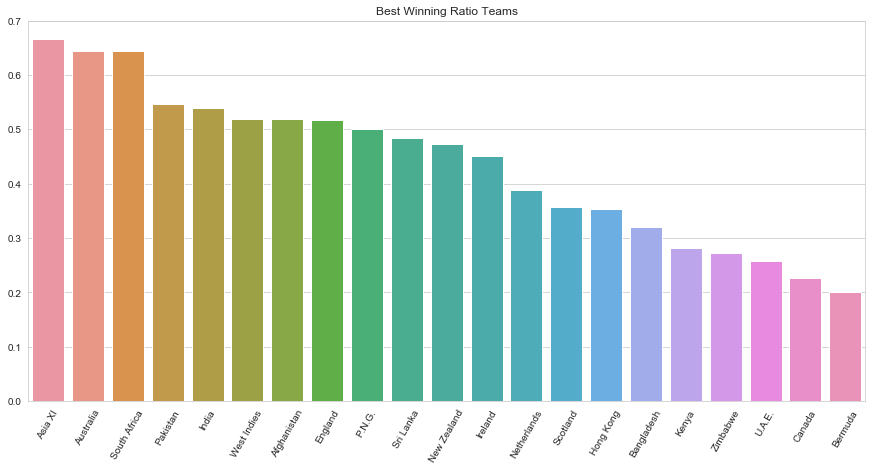

In [52]:
plt.figure(figsize=(15,7))
plt.xticks(rotation=60)
plt.title("Best Winning Ratio Teams")
sns.barplot(x=Ratio_df.index,y=Ratio_df);

It's surpise for us that Pakistan is in lead as compare to India in Winning Ratio.

# Q(5) - Which cricket ground is used to play the cricket matches most of time?

For finding this, we will write this code...

In [53]:
ground_df = raw_df.Ground.value_counts()

In [54]:
ground_df

Sharjah         226
Dhaka           154
Sydney          147
Melbourne       143
Harare          134
               ... 
Hove              1
Vijayawada        1
Ballarat          1
New Plymouth      1
Whangarei         1
Name: Ground, Length: 172, dtype: int64

Here in this dataframe, there are total of 172 ground names and we can not plot these values. So we taking top 25 Cricket Grounds.

In [55]:
Ground_df = ground_df.head(25)

In [56]:
Ground_df

Sharjah          226
Dhaka            154
Sydney           147
Melbourne        143
Harare           134
Colombo (RPS)    116
Adelaide          80
Perth             79
Brisbane          72
Auckland          71
Bulawayo          67
The Oval          64
Port of Spain     62
Nairobi (Gym)     61
Christchurch      58
Lahore            58
Lord's            57
Colombo (SSC)     53
Wellington        51
Birmingham        51
Dambulla          49
Centurion         48
Johannesburg      45
Karachi           44
Manchester        44
Name: Ground, dtype: int64

This is the result. "Sharjah" is the cricket ground where maximum 226 match played.

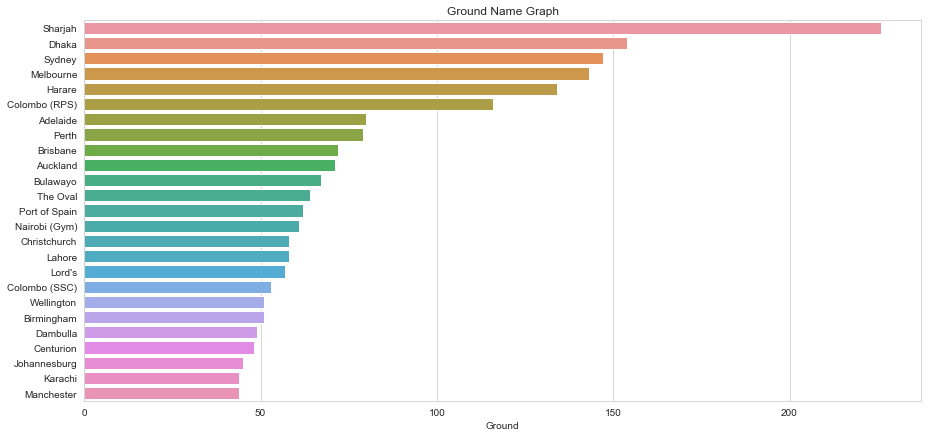

In [57]:
plt.figure(figsize=(15,7))
plt.xticks(rotation=0)
plt.title("Ground Name Graph")
sns.barplot(x=Ground_df,y=Ground_df.index);

# Summary

So here we completed our analysis. In this analysis we saw the many Records of different-different Cricket Teams, We Sorted All the datas and worked on it for get a complete and beautiful dataset.
Cricket is a great game and we should proud that India is also a part of Cricket.